**REGRESSION MODEL USING FFNN :**
# Tasks Being carried out :
 - UNDERSTANDING THE DATA
 - EDA
 - DIVIDE THE DATA INTO TRAIN AND TEST
 - BUILDING NN MODEL
 - COMPILE THE MODEL
 - FIT THE MODEL ON TRAINING DATA SET (BY VALIDATION DATA SEPERATELY OUT OF TRAINING THE DATA)
 - CHECK WHETHER THERE IS OVERFIT BY COMPARING TRAINING LOSS AND VALIDATION LOSS
 - PLOT THE LOSS
 - IF THERE IS AN OVERFIT TRY TO OVERCOME USING SOME REGULARIZATION TECHNIQUE .

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print(tf.__version__)

2.3.0


In [4]:
#DATA Exploration

In [5]:
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Next, we load the data into 'dataframe' object for easier manipulation
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head() # Notice that the target variable (MEDV) is not included

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# For some reason, the loaded data does not include the target variable (MEDV), we add it here
data['MEDV'] = pd.Series(data = boston.target, index = data.index)
data.describe() # Get some basic stats on the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.tail() # Check out the end of the data (last 5 rows)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [10]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
train_dataset=data.sample(frac=0.7,random_state=0)
test_dataset=data.drop(train_dataset.index)

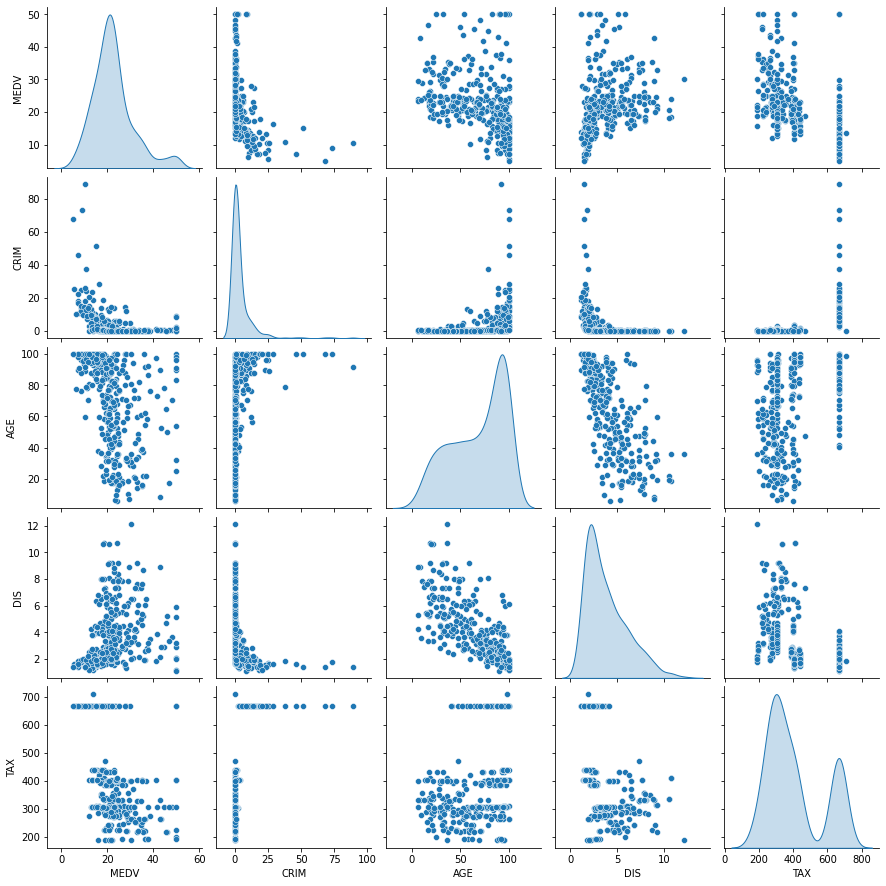

In [12]:
#INSPECT THE DATA
#HAVING A QUICK LOOK AT THE JOIINT DISTRIBUTION OF A FEW PAIRS OF COLUMNS FROM THE TRAINING SET.
sns.pairplot(train_dataset[["MEDV", "CRIM", "AGE", "DIS", "TAX"]], diag_kind="kde")

In [13]:
train_stats=train_dataset.describe()
train_stats.pop("MEDV")
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AGE,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


Split features from labels
Separate the target value, or "label", from the features. This label is the value that you will train the model to predict

In [14]:
train_labels=train_dataset.pop("MEDV")
test_labels=test_dataset.pop("MEDV")

In [15]:
#Normalize the data
#Look again at the train_stats block above and note how different the range of each features are.

#It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the inputs.

#Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to don that to project the test dataset into the same distribution that tse model has been trained on.

In [16]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier. That includes the test set as well as live data when the model is used in production.

***THE NEURAL MODEL :***

Build the model
Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that return a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

In [17]:
def build_model():
  model = keras.Sequential([
                            layers.Dense(64, activation = 'relu', input_shape = [len(train_dataset.keys())]),
                            layers.Dense(64, activation = 'relu'),
                            layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001) # default learning rate is 0.001
  
  model.compile(loss = 'mse',
                optimizer = optimizer,
                metrics = ['mae', 'mse', 'mape'])
  return model

In [18]:
model = build_model()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


***Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.***

In [20]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.356955  ],
       [ 0.0252894 ],
       [ 1.0848683 ],
       [ 0.20882918],
       [ 0.23331414],
       [ 0.1473515 ],
       [ 0.00574785],
       [ 0.08705683],
       [-0.08272268],
       [ 0.21038134]], dtype=float32)

***Text the model:***

***Train the model for 1000 epochs, and record the training and validation*** ***accuracy in the history object***.

***Note the validation_split set to use 20% of the training data as validation set and the remainder as calibration. Important to note that this is separate from the testing data that we do not touch in the model-training.***

In [21]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch%100 == 0: print('')
    print('.', end = '')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 1, callbacks = [PrintDot()]
)

Epoch 1/1000
9/9 [==============================] - 0s 22ms/step - loss: 497.5637 - mae: 20.6923 - mse: 497.5637 - mape: 93.7778 - val_loss: 579.4938 - val_mae: 22.0755 - val_mse: 579.4938 - val_mape: 88.9871
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 433.3366 - mae: 19.0758 - mse: 433.3366 - mape: 84.9680 - val_loss: 512.3511 - val_mae: 20.5544 - val_mse: 512.3511 - val_mape: 81.5010
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 370.3471 - mae: 17.3647 - mse: 370.3471 - mape: 75.9873 - val_loss: 439.3566 - val_mae: 18.9021 - val_mse: 439.3566 - val_mape: 75.0959
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 305.3925 - mae: 15.5101 - mse: 305.3925 - mape: 67.2149 - val_loss: 363.7314 - val_mae: 17.0421 - val_mse: 363.7314 - val_mape: 68.5740
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 241.5670 - mae: 13.4415 - mse: 241.5670 - mape: 58.0873 - val_loss: 288.8420 - val_mae: 14.9476

***Visualize the model's training progress using the stats stored in the history object.***

In [22]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,0.598512,0.570604,0.598512,3.020133,28.581308,3.097653,28.581308,23.180416,995
996,0.651337,0.604354,0.651337,3.168074,26.717495,3.031611,26.717495,22.586039,996
997,0.591430,0.549684,0.591430,2.840264,28.700825,3.112271,28.700825,23.267336,997
998,0.562454,0.553842,0.562454,2.887502,28.829844,3.120653,28.829844,23.568800,998
999,0.448620,0.478015,0.448620,2.488993,25.667542,3.010076,25.667542,22.144316,999


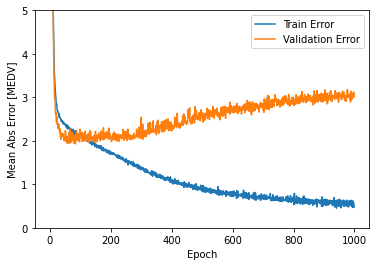

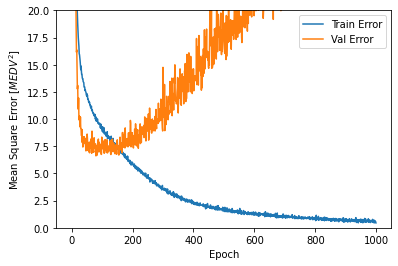

In [23]:
def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'],hist['mae'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mae'],label='Validation Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'],hist['mse'],label='Train Error')
  plt.plot(hist['epoch'],hist['val_mse'],label='Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

***This graph shows little important, or actually a fairly severe degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't imporve.***

In [24]:
model=build_model()
#The patience parameter is the amount of epochs to check for improvement
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(normed_train_data,train_labels,epochs=EPOCHS,validation_split=0.2,verbose=1,callbacks=[early_stop,PrintDot()])

Epoch 1/1000
9/9 [==============================] - 0s 26ms/step - loss: 515.7944 - mae: 21.0593 - mse: 515.7944 - mape: 95.5019 - val_loss: 602.2871 - val_mae: 22.4816 - val_mse: 602.2871 - val_mape: 90.5916
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 455.7977 - mae: 19.5788 - mse: 455.7977 - mape: 87.4536 - val_loss: 535.4925 - val_mae: 21.0129 - val_mse: 535.4925 - val_mape: 83.6709
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 392.5502 - mae: 17.9241 - mse: 392.5502 - mape: 78.8510 - val_loss: 459.7657 - val_mae: 19.2842 - val_mse: 459.7657 - val_mape: 76.2806
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 322.6155 - mae: 15.9756 - mse: 322.6155 - mape: 69.2566 - val_loss: 378.0322 - val_mae: 17.3365 - val_mse: 378.0322 - val_mape: 68.9002
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 252.1151 - mae: 13.7702 - mse: 252.1151 - mape: 58.9482 - val_loss: 294.6000 - val_mae: 15.0701

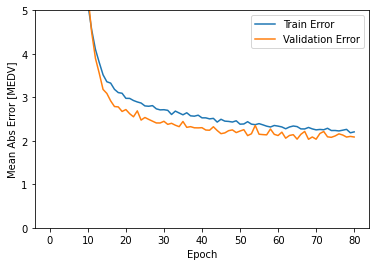

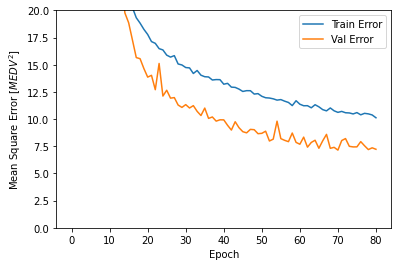

In [25]:
plot_history(history)

***Let's re-plot the history to hopefully see the model training stopped before things get worse for the validation data.***

In [26]:
mse=model.evaluate(normed_test_data,test_labels,verbose=0)
print("Testing set Mean Abs Error: ",mse)

Testing set Mean Abs Error:  [12.233001708984375, 2.4881017208099365, 12.233001708984375, 13.202718734741211]


***Make predictions
Finally, we predict MEDV values using data in the testing set (and also training, which we will use in the next step to compute more error metrics):***

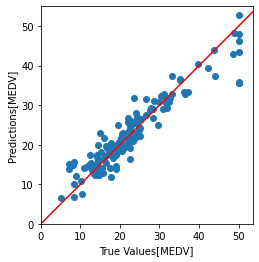

In [27]:
#MAKE PREDICTONS
test_predictions=model.predict(normed_test_data).flatten()
train_predictions=model.predict(normed_train_data).flatten()
plt.scatter(test_labels,test_predictions)
plt.xlabel('True Values[MEDV]')
plt.ylabel('Predictions[MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100,100],[-100,100],color='red')
plt.show()

Text(0, 0.5, 'Count')

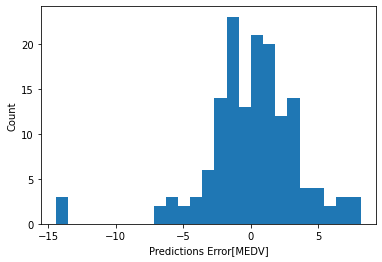

In [28]:
#Error Analysis
error=test_predictions-test_labels
plt.hist(error,bins=25)
plt.xlabel("Predictions Error[MEDV]")
plt.ylabel("Count")

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(test_labels, test_predictions)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(test_labels, test_predictions)
print('Mean Absolute Error:', mae)
rsq = r2_score(train_labels, train_predictions) # R-Squared on the training data
print('R-square, Training:', rsq)
rsq = r2_score(test_labels, test_predictions) # R-Squared on the testing data
print('R-square, Training:', rsq)

Mean Squared Error: 12.233002276275604
Mean Absolute Error: 2.4881018845658556
R-square, Training: 0.8818586450571311
R-square, Training: 0.876403272876543
